# Astrophysics Homework Five

## Alexandra Higley

In [1]:
import numpy as np
from pylab import *
from math import e
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
import scipy
from scipy import stats
import math
import random

Questions 1, 2 and 8 were answered fully in my written work that is attached at the end. See the end for those questions.  

### Question Three

Question 3 was partly done in the attached written work (see end). Here I am calculating the propogation of error and finding an uncertainty for the Roche limit using what was derived in the written work. 

In [2]:
G = 6.67E-11
rad_e = 6.371E6
rad_j = 69.911E6
mass_e = 5.972E24
mass_j = 1.899E27

rad_eu = 1.274E6
mass_eu = 1.194E24
mass_ju = 3.798E27

In [3]:
def getRprop(me,mj,re,mju,meu,reu):
    y1 = ((((2/me)**(1/3))*(re/3)*(1/((mj)**(2/3))))**2)*((mju)**2)
    y2 = ((-((2*mj)**(1/3))*(re/(3*(me**(4/3)))))**2)*((meu)**2)
    y3 = ((((2*mj)/me)**(1/3))**2)*((reu)**2)
    y4 = np.sqrt(y1+y2+y3)
    return y4

In [4]:
Ru = getRprop(mass_e,mass_j,rad_e,mass_ju,mass_eu,rad_eu)
print(Ru)

38307532.324979976


In [5]:
def getRoche(r,m1,m2):
    R = r*((2*m1)/m2)**(1/3)
    return R

In [6]:
lim = getRoche(rad_e, mass_j, mass_e)
perct = 100*(Ru/lim)

print("The Roche limit of Earth if it was orbiting Jupiter is", round(lim, 3), "+/-", round(Ru, 3),"m, \nor", (round((lim/rad_j), 3)),  "+/-",round(Ru/rad_j, 3), "Jupiter radii")
print("\nThis is ",round(perct,3),"% of the normal Roche Radius")



The Roche limit of Earth if it was orbiting Jupiter is 54788068.768 +/- 38307532.325 m, 
or 0.784 +/- 0.548 Jupiter radii

This is  69.919 % of the normal Roche Radius


## Question Four

The first parts of this question was done on paper, so see the atrtahced work for that. Here we are computing the propogation of error for luminosity. When I did this problem, I decided that the two stars were a type 5 O5 star and a type V O6 star, so I will be using values that correlate to those stellar types to solve for the luminosities. 

Based on that question from Hw 3, I estimate the uncertainty on the radii to be +/- 2 solar radii and the uncertainty on the temperature to be +/- 10,000 K.  

In [7]:
r1 = 13.4*6.957e8
r2 = 12.2*6.957e8

sigma = 5.67*(10**-8) #m2 kg s-2 K-1
temp1 = 42000
temp2 = 39500

Tu4 = 2
Ru4 = 1*6.957e8

In [8]:
def lum(temp,r):
    L = 4*np.pi*(r**2)*sigma*temp**4
    return L

In [9]:
def Lprop(T,R,Ru,Tu):
    y1 = ((8*np.pi*sigma*(T**4)*R)**2)*((Ru)**2)
    y2 = ((16*np.pi*(R**2)*sigma*(T**3))**2)*((Tu)**2)
    y3 = 2*Ru*Tu*y1*y2
    y4 = np.sqrt(y1+y2+y3)
    return y4

In [10]:
#Star One
lum1 = lum(temp1,r1)
prop1 = Lprop(temp1,r1,Ru4,Tu4)

lum1_s = lum1/3.839e26
prop1_s = prop1/3.839e26

#Star Two
lum2 = lum(temp2,r2)
prop2 = Lprop(temp2,r2,Ru4,Tu4)

lum2_s = lum2/3.839e26
prop2_s = prop2/3.839e26

print(lum1_s, prop1_s)
print(lum2_s, prop2_s)

501909.6847624659 1.4503611399074988e+38
325481.9141226391 7.123212305159582e+37


In [11]:
print("The Luminosity of Star One is 501909 +/- 1.450E38 solar luminosities \n")
print("The Luminosity of Star Two is 325481 +/- 1.123E38 solar luminosities")

The Luminosity of Star One is 501909 +/- 1.450E38 solar luminosities 

The Luminosity of Star Two is 325481 +/- 1.123E38 solar luminosities


These propogations of error are quite large, probably due to the T^4 term and T^3 term that still exist within the propogation of error (this or I did something wrong because the uncvertaies are *huge*). Even if I change the uncertainties on the stellar radii and temperatures to something fairly small, the uncertainty on the luminosity is large. This suggests it is hard to get very accurate values for luminosity. 

## Question Five

To find the probability of falling above or below three sigma, we should probably work with a normal Gaussian which has a mean of one and a standard deviation of 1. 

In [12]:
dx = 0.01
x = np.arange(-10,10,dx)
#x = np.linspace(-10, 10, 100)
mu = 0
sig = 1
#normal distribution 

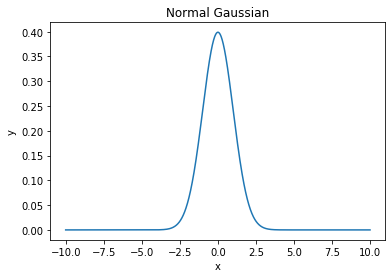

In [13]:
y = (e**((-x**2)/2))/(np.sqrt(2*np.pi))
#Equation for a normal Gaussian 

plt.plot(x,y);
plt.title("Normal Gaussian")
plt.xlabel("x")
plt.ylabel("y");

In [14]:
area = np.sum(y)*dx #taking summation of the entire curve
print("The total area of a normal distribution is,",round(area,5),"as expected.")

The total area of a normal distribution is, 1.0 as expected.


Now that we have numerically solved for the area under the Guassian, we can now find the area before and after three sigma. This is done by finding where three sigma is and integrating over those data points. 

In [15]:
tsig = sig*3
mask3s = ((mu-tsig <= x) & (x <= mu+tsig)) 
#making a mask to find what data is within 3sigma
loc3s = np.where(mask3s == False)[0] #not within 3sigma 
locres = np.where(mask3s == True)[0] #within sigma

#integrating what's not within 3sigma
area3s = np.sum(y[loc3s])*dx
print("The probability of getting a result higher or lower than 3 sigma is",round(area3s,6))

The probability of getting a result higher or lower than 3 sigma is 0.0027


This probability that was found numerically, 0.27%, agrees with what we have learned in class. It is very improbable that results fall beyond 3 standard deviations. 

## Question 6

First we need to make 10,000 random numbers between 0 and 1. These are all to be called "cos(i)"

In [16]:
r = np.empty(10000)
for i in range(len(r)):
    r[i] = random.randint(0,10000)

rl = r/(10000)

With that complete, we now need to find i, which will be the inverse cosine of the random numbers. Additionally, I wanted to work in degrees for this problem, so I converted all of my values for "i" to degrees. 

In [17]:
rr = np.empty(10000)
for i in range(len(rr)):
    rr[i]= math.acos(rl[i])
    
rr = np.array(rr) #random numbers in radians
rd = rr*((180/np.pi)) #random numbers in degrees

Now I can make my histograms and try to interpret what is going on here

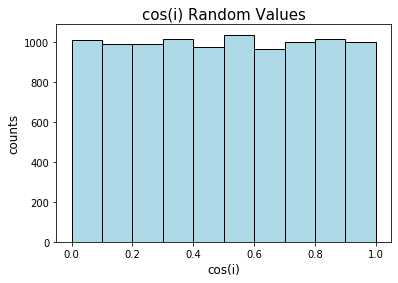

In [18]:
plt.hist(rl,edgecolor='black', facecolor='lightblue');
plt.title("cos(i) Random Values",fontsize=15)
plt.xlabel("cos(i)",fontsize=12)
plt.ylabel("counts",fontsize=12);

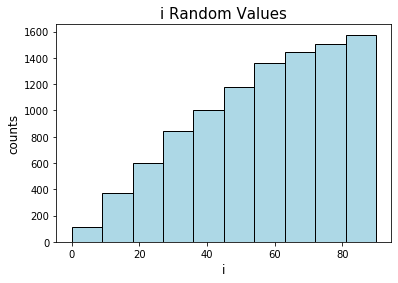

In [19]:
plt.hist(rd,edgecolor='black', facecolor='lightblue')
plt.title("i Random Values",fontsize=15)
plt.xlabel("i",fontsize=12)
plt.ylabel("counts",fontsize=12);

This is interesting, because even though random numbers were chosen, we still see a patter arise for the i values. If I were to run this over and over again, getting new random numbers each time, I'd find that the same shape appears. We can see that the cos(i) values are random— they are uniformly distributed, however when we take the inverse cosine of them, we see that there are higher probabilities of being distributed in the larger angles. 

There is a reason for this. From class, we know that it is more probable that we find edge-on galaxies (inclination = 90 degrees) rather than face-on galaxies (inclination = 0 degrees). This is because there are more axes to view edge-on galaxies on, whereas there is only one axis to view a face-on galaxy. Another way to think about it is if you were abducted by aliens and then randomly placed back down on the earth: it will be more probable that you fall near the equator, where it is "90 degrees". This is why we see the larger counts around 90 degrees. 

## Question 7

Note that the first part of this question was done on paper. See the attached work. 

For the rest of this question, we can use the Maxwell-Boltzmann distribution to find the probability that hydrogen or oxygen escapes the atmosphere. As it turns out, I don't think the rms speeds of Hydrogen and Oxygen matter much. 

In [20]:
R = 8.31
T = 289 #K

mo2 = 0.032 #kg/mol
mh =  0.001 

vo2 = 474.799
vh = 2684.17

dx7 = 0.005
o2x = np.arange(0,12000,dx7)
hx = np.arange(0,12000,dx7)

#o2x = np.linspace(0,12000,100000)
#hx = np.linspace(0,12000,100000)

#divide by 1000 to put into kg 

Now, using the equation for thr Maxwell-Boltzmann distribution we can plug in the respective values for both gases and then compare the distributions

In [21]:
y1h = 4*np.pi*hx**2
y2h = (mh/(2*np.pi*R*T))**(3/2)
y3h = np.exp(-(mh*hx**2)/(2*R*T))
yh = y1h*y2h*y3h

y1o2 = 4*np.pi*o2x**2
y2o2 = (mo2/(2*np.pi*R*T))**(3/2)
y3o2 = np.exp(-(mo2*o2x**2)/(2*R*T))
yo2 = y1o2*y2o2*y3o2

In [22]:
def maxbolt(v,m,T):
    y1 = 4*np.pi*v**2
    y2 = (m/(2*np.pi*R*T))**(3/2)
    y3 = np.exp(-(m*v**2)/(2*R*T))
    y = y1*y2*y3
    return y

/Users/alexh/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


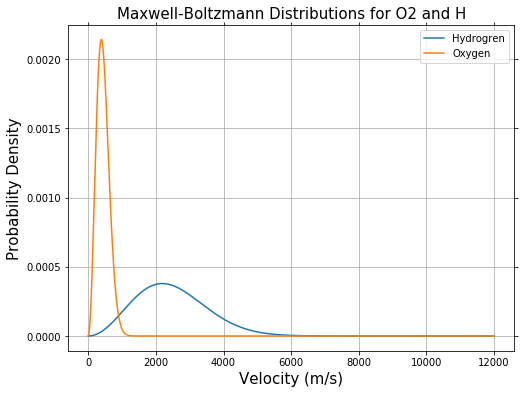

In [23]:
#plotting
fig1,ax1 =plt.subplots(figsize=(8,6))

ax1.plot(hx, yh, label="Hydrogren")
ax1.plot(o2x, yo2,label="Oxygen")

ax1.set_xlabel('Velocity (m/s)',fontsize=15)
ax1.set_ylabel('Probability Density',fontsize=15)

ax1.tick_params(axis='both',which='minor',direction='in')
ax1.tick_params(top=True,right=True)
ax1.tick_params(which='minor',top=True,right=True)

ax1.set_title("Maxwell-Boltzmann Distributions for O2 and H", fontsize = 15)
ax1.grid()

plt.legend()
plt.show()

From this plot, we can see that the escape velocity of Earth (11,182 m/s) is pretty far out for both distributions, however it is *more* far out for Oxygen's distribution. We have to keep in mind that these plots indicate probability densities, and even though it appears that there is a zero-probability chance of either gasses ever surpassing 11,182 m/s, this is not the case. Hypothetically, either distributions will reach zero, just approch it. 

Hopefully, we can calculate the probability for each gas to surpass Earth's escape velocity. It might be noted that I dook a dx to be 0.005 for this integral (my computer couldn't handle much smaller) and this is what I will use to find the area under the curves *after* 11,182 m/s

In [24]:
#Starting out with Hydrogen 

area7h = np.sum(yh)*dx7 #taking summation of the entire curve
# it equals one, if I were to print this out. 

mask7h = ((11182 <= hx) & (hx <= 11182))
loc7h = np.where(mask7h == False)[0] #where H doesnt escape
loc7h_esc = np.where(mask7h == True)[0] #where H does escape

area7h_esc = np.sum(yh[loc7h_esc])*dx7
print("The probability of Hydrogen escaping Earth's atmosphere is",area7h_esc)

The probability of Hydrogen escaping Earth's atmosphere is 6.631009910693091e-16


In [25]:
#O2

area7o2 = np.sum(yo2)*dx7 #taking summation of the entire curve
#Also equals one if i were to print it out. 

mask7o2 = ((11182 <= o2x) & (o2x <= 11182))
loc7o2 = np.where(mask7o2 == False)[0]
loc7o2_esc = np.where(mask7o2 == True)[0]

area7o2_esc = np.sum(yo2[loc7o2_esc])*dx7
print("The probability of Oxygen escaping Earth's atmosphere is",area7o2_esc)

The probability of Oxygen escaping Earth's atmosphere is 0.0


So, the probability of Oxygen escaping Earth's atmpsphere isn't actually 0, but it is so close to zero that I couldn't find a way to get a value from my computer that didn't end up freezing everything. If I wanted to, I could instead perform the calcuation by hand and take the integral of the curve from 0 to infinity, but I belive that this is evidence enough to show how the probability of Oxygen escaping Earth's atmosphere is much, much smaller than that of Hydrogen's. And Hydrogen's probability is pretty small. However, we have to keep in mind that Earth is also pretty old, and over enough time, all Hydrogen will eventually escape Earth's atmosphere, despite how small the probability of escape is. This is true for Oxygen as well, however since Oxygen's probability is as infinesimally small as it is, it will take much more time for it to escape, far longer than Earth has existed. 

This is why we still have heavier elements in our atmosphere, but no Hydrogen. 

## Question 9

Continuing with this problem here, I decided to use the mass of hydrogen to find a value for rho. We can also ignore m when calculating the scale height becuase in the written problem, it went away

In [26]:
CMM_t = 10
CNM_t = 100
WIM_t = 10000
HCM_t = 10E6

CMM_rho = 1.66E-24*0.001 #multiplied by rough guesses of how much hydrogen you would see per cm
CNM_rho = 1.66E-24*0.5
WIM_rho = 1.66E-24*0.25
HCM_rho = 1.66E-24*0.1

G = 6.67E-8
k = 1.38E-16
m = 1 #m doesn't matter

In [27]:
def getg(rho):
    g = G*rho*2*np.pi
    return g

CMM_g = getg(CMM_rho)
CNM_g = getg(CNM_rho)
WIM_g = getg(WIM_rho)
HCM_g = getg(HCM_rho)

In [28]:
def getscale(T,g):
    scale = (k*T)/(m*g)
    return scale

CMM_s = getscale(CMM_t,CMM_g)
CNM_s = getscale(CNM_t,CNM_g)
WIM_s = getscale(WIM_t,WIM_g)
HCM_s = getscale(HCM_t,HCM_g)

print("The scale height for the Cold Molecular Medium is",round(CMM_s/(3.086e+18),5),"pc")
print("The scale height for the Cold Neutral Medium is",round(CNM_s/(3.086e+18),5),"pc")
print("The scale height for the Warm Ionized Medium is",round(WIM_s/(3.086e+18),5),"pc")
print("The scale height for the Hot Coronal Medium is",round(HCM_s/(3.086e+18),5),"pc")

The scale height for the Cold Molecular Medium is 0.64279 pc
The scale height for the Cold Neutral Medium is 0.01286 pc
The scale height for the Warm Ionized Medium is 2.57116 pc
The scale height for the Hot Coronal Medium is 6427.90389 pc


These values are in the ballpark, but are slighly off. This is probably due to us assuming that the disk is 2D when it is not, as well as only using hydrogen to calculate the mass density. In reality, The warm ionized medium would be composed of things like H+, He+, and O+, and the hot coronal medium would be composed of O^5+, Fe^25+, and Si^10+ (much heavier things). 

## Question 10

To find the number densities, we can use:

P = nkT

In [29]:
P = 1E-10

def getn(T):
    n = P/(k*T)
    return n
    
CMM_n = getn(CMM_t)
CNM_n = getn(CNM_t)
WIM_n = getn(WIM_t)
HCM_n = getn(HCM_t)

print("The number density for the Cold Molecular Medium is",round(CMM_n,1),"cm^-3")
print("The number density for the Cold Neutral Medium is",round(CNM_n,2),"cm^-3")
print("The number density for the Warm Ionized Medium is",round(WIM_n,3),"cm^-3")
print("The number density for the Hot Coronal Medium is",round(HCM_n,4),"cm^-3")

The number density for the Cold Molecular Medium is 72463.8 cm^-3
The number density for the Cold Neutral Medium is 7246.38 cm^-3
The number density for the Warm Ionized Medium is 72.464 cm^-3
The number density for the Hot Coronal Medium is 0.0725 cm^-3
